# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



Pertama, kita harus menentukan 2/3 variabel yang ingin ditinjau. Lalu, kita coba melihat hubungan antara variabel tersebut dengan cara membuat grafik scatterplot. Cara kerja algoritma k-mean clustering diawali dengan memilih jumlah centroid yang kita inginkan. Centroid adalah sebuah titik data pada suatu grafik hubungan variabel yang ingin ditinjau, yang mana menunjukan sebuah nilai tengah dari kluster data dan mewakilkan kluster. 

---
Jika kita ingin membuat 2 jenis kluster, maka akan dipilih 2 centroid yang dipilih secara acak. Lalu setiap titik data akan dimasukkan dalam suatu kluster dengan cara memilih centroid dengan jarak terdekat dari titik data tersebut. Jarak tersebut ditentukan menggunakan rumus euclidean distance. Maka sekarang tiap titik data akan diklasifikasikan pada suatu klaster berdasarkan centroid terdekat. Namun, proses klusterisasi data tidak berhenti pada proses ini, melainkan centroid baru akan dicari. Centroid baru dicari dengan cara mencari nilai rata - rata koordinat, yakni X dan Y dari masing - masing titik data yang berada pada kluster yang sama berdasarkan hasil klusterisasi sebelumnya. Setelah itu, akan diperoleh suatu 2 titik koordinat baru sebagai centroid. Lalu titik data akan di-klusterisasi kembali berdasarkan jarak terdekat dengan centroid baru. Proses tersebut akan diiterasi terus menerus hingga ditemukan suatu nilai posisi centroid yang tidak berubah - ubah saat dicari lagi nilai rata - rata koordinat dari titik data. Hasilnya adalah diperoleh sebuah klusterisasi data dengan jumlah 2 kategori kluster.


---



---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [2]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_pelanggan                250 non-null    int64  
 1   Jenis Kelamin               250 non-null    object 
 2   Umur                        245 non-null    float64
 3   Pendapatan pertahun (juta)  250 non-null    int64  
 4   Skor Belanja (1-100)        246 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.9+ KB


,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [3]:
#handling missing value
df.fillna(method = 'ffill', inplace = True)
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [4]:
#handling outlier
def get_bound(data):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    lower_bound = data.quantile(0.25) - (iqr*1.5)
    upper_bound = data.quantile(0.75) + (iqr*1.5)
    return lower_bound, upper_bound

def get_outliers(data):
    lower_bound, upper_bound = get_bound(data)
    return data[((data > upper_bound) | (data < lower_bound))].sum()

def remove_outliers(data):
    lower_bound, upper_bound = get_bound(data)
    df_new = data[((data < upper_bound) & (data > lower_bound))].copy()
    return df_new
df_clean = remove_outliers(df[['Umur','Skor Belanja (1-100)']])
df_clean.dropna(axis = 0, inplace = True)
df_clean

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


In [5]:
#rescaling data 
sc = StandardScaler()
df_scale = sc.fit_transform(df_clean)

In [6]:
#clustering
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_scale)
labels1 = kmeans1.labels_
new_df2 = pd.DataFrame(data=df_scale, columns=['Umur','Skor Belanja (1-100)'])
new_df2['label1_2cent'] = labels1

n_cluster  = 2


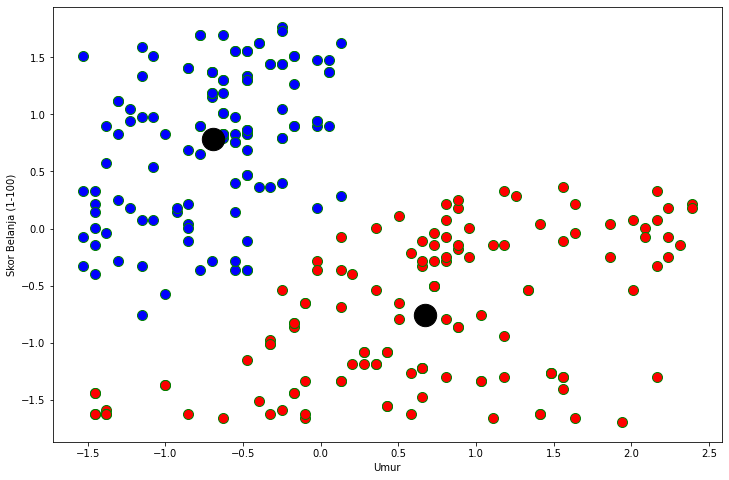

In [7]:
print("n_cluster  = 2")
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(new_df2['Umur'][new_df2.label1_2cent == 0], new_df2['Skor Belanja (1-100)'][new_df2.label1_2cent == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df2['Umur'][new_df2.label1_2cent == 1], new_df2['Skor Belanja (1-100)'][new_df2.label1_2cent == 1], c='red', s=100, edgecolor='green')
plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax.set(xlabel = 'Umur', ylabel = 'Skor Belanja (1-100)')
plt.show()

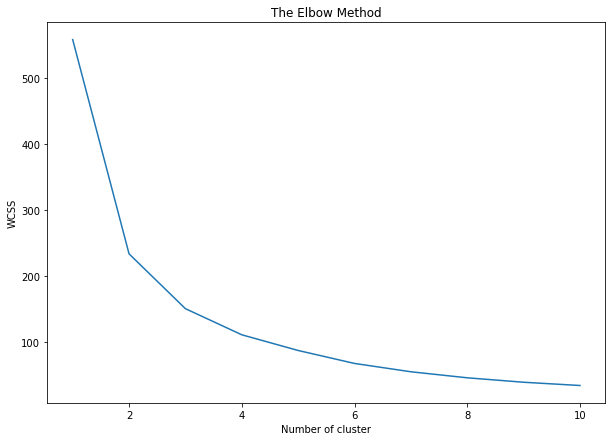

In [8]:
#elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(new_df2)
  wcss.append(kmeans.inertia_)

fig2, ax2 = plt.subplots(figsize=(10,7))
plt.plot(range(1,11), wcss)
ax2.set(xlabel ='Number of cluster' , ylabel = 'WCSS' , title = 'The Elbow Method')
plt.show()

n_cluster  =3


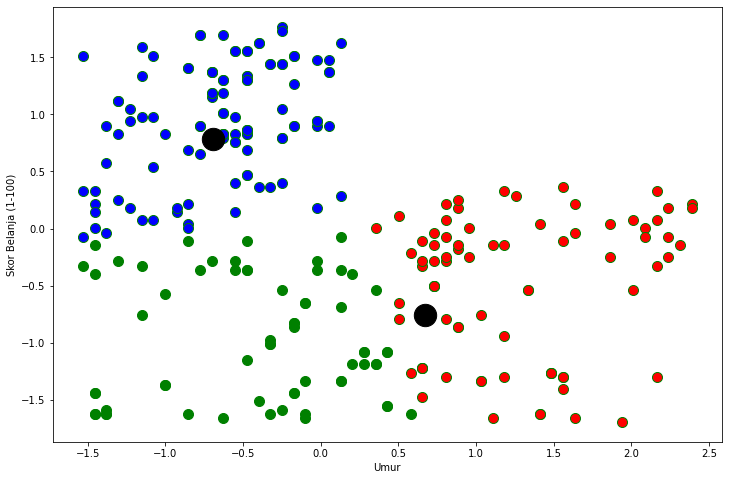

In [9]:
print("n_cluster  =3")
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_scale)
labels2 = kmeans2.labels_
new_df2['label2_3cent'] = labels2
fig3, ax3 = plt.subplots(figsize=(12,8))
plt.scatter(new_df2['Umur'][new_df2.label2_3cent == 0], new_df2['Skor Belanja (1-100)'][new_df2.label2_3cent == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df2['Umur'][new_df2.label2_3cent == 1], new_df2['Skor Belanja (1-100)'][new_df2.label2_3cent == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df2['Umur'][new_df2.label2_3cent == 2], new_df2['Skor Belanja (1-100)'][new_df2.label2_3cent == 2], c='green', s=100, edgecolor='green')
plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax3.set(xlabel = 'Umur', ylabel = 'Skor Belanja (1-100)')
plt.show()

In [10]:
print("Koefisien silhoutte saat cluster = 2 adalah {}".format(silhouette_score(new_df2, labels = labels1)))
print("Koefisien silhoutte saat cluster = 3 adalah {}".format(silhouette_score(new_df2, labels = labels2)))

Koefisien silhoutte saat cluster = 2 adalah 0.5245622611809337
Koefisien silhoutte saat cluster = 3 adalah 0.5816811722585028


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

In [11]:
new_df2_invert = pd.DataFrame(data=sc.inverse_transform(df_scale), columns=['Umur', 'Skor Belanja (1-100)'])
new_df2_invert['labels1'] = labels1
new_df2_invert['labels2'] = labels2
new_df2_invert

,Umur,Skor Belanja (1-100),labels1,labels2
0,19.0,39.0,0,2
1,21.0,81.0,0,0
2,20.0,6.0,1,2
3,23.0,77.0,0,0
4,31.0,40.0,0,2
...,...,...,...,...
243,27.0,69.0,0,0
244,59.0,14.0,1,1
245,35.0,90.0,0,0
246,37.0,32.0,1,2


n_cluster  = 2


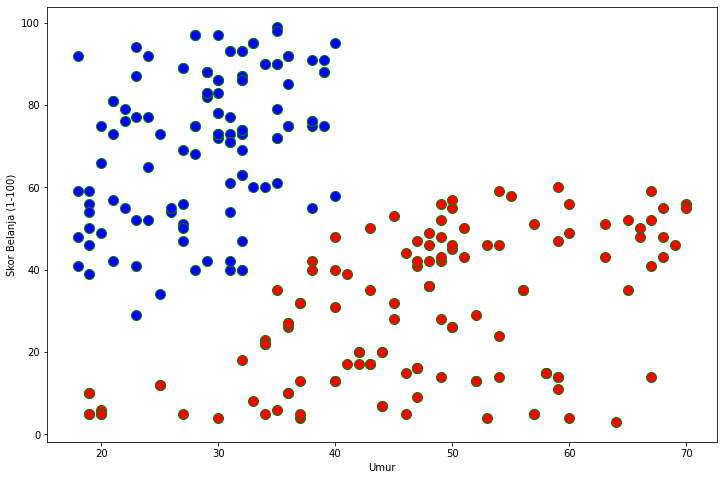

n_cluster  = 3


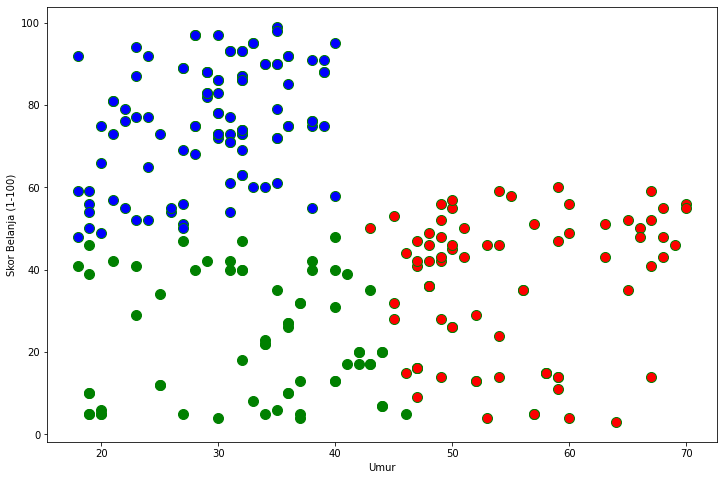

In [12]:
#plot 2 kluster setelah diinverse
print("n_cluster  = 2")
fig4, ax4 = plt.subplots(figsize=(12,8))
plt.scatter(new_df2_invert['Umur'][new_df2_invert.labels1 == 0], new_df2_invert['Skor Belanja (1-100)'][new_df2_invert.labels1 == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df2_invert['Umur'][new_df2_invert.labels1 == 1], new_df2_invert['Skor Belanja (1-100)'][new_df2_invert.labels1 == 1], c='red', s=100, edgecolor='green')
# plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax4.set(xlabel = 'Umur', ylabel = 'Skor Belanja (1-100)')
plt.show()

#plot 3 kluster setelah diinverse
print("n_cluster  = 3")
fig5, ax5 = plt.subplots(figsize=(12,8))
plt.scatter(new_df2_invert['Umur'][new_df2_invert.labels2 == 0], new_df2_invert['Skor Belanja (1-100)'][new_df2_invert.labels2 == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df2_invert['Umur'][new_df2_invert.labels2 == 1], new_df2_invert['Skor Belanja (1-100)'][new_df2_invert.labels2 == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df2_invert['Umur'][new_df2_invert.labels2 == 2], new_df2_invert['Skor Belanja (1-100)'][new_df2_invert.labels2 == 2], c='green', s=100, edgecolor='green')
# plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=500 ) #plotting posisi centeroid
ax5.set(xlabel = 'Umur', ylabel = 'Skor Belanja (1-100)')
plt.show()



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

---
Untuk nilai koefisien silhoutte, perbedaan nilai saat jumlah kluster 2 dan 3 tidak berbeda jauh, yakni disekitar nilai 0.5. Jika dilihat berdasarkan grafik, jarak titik - titik data dari tiap kluster dengan yang lainnya tidak terlalu jauh.

---
Untuk nilai n_cluster = 2, terlihat bahwa terdapat 2 segementasi. Segmen 1 yang berwarna merah berada pada semua rentang umur, namun nilai skor belanja masih dibawah 60. Segmen 2 yang berwarna biru berada pada nilai umur dibawah 40 tahun, namun nilai skor belanja sekitar 50 - 100.

---
Untuk nilai n_cluster = 3, terlihat bahwa terdapat 3 segmentasi. Segmen 1 yang berwarna hijau berada pada rentang umur 0 - 45 tahun dengan nilai skor belanja berkisar antara 0 - 40. Segmen 2 yang berwarna merah berada pada rentang umur 45 - 70 tahun dengan nilai skor belanja berkisar antara 0 - 60. Segmen 3 yang berwarna biru berada pada rentang umur 0 - 40 tahun dengan nilai skor belanja berkisar 50 - 100.

---
Analisis pelanggan untuk kemajuan supermarket akan saya tinjau pada nilai cluster = 3 karena nilai koefisien silhouette lebih besar dibanding pada nilai cluster = 2. Terlihat bahwa pada segmen 1 dan segmen 3 umur pelanggan lebih muda dibandingkan pada segmen 2. Peningkatan pada penjualan di segmen 3 dapat ditingkatkan dengan menyediakan fasilitas seperti counter khusus orang yang berumur agar tidak terlalu lama mengantri karena tubuh yang tentunya tidak sekuat anak muda. Serta dapat juga memperbanyak kebutuhan sehari untuk khusus untuk orang berumur dan meletakkan barang pada lokasi yang mudah dijangkau. Sedangkan untuk meningkatkan skor belanja pada segmen 1 dapat dilakukan dengan memberikan banyak promo serta barang yang sedang hype.